In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Dataset
    In this dataset our desired target for classification task will be converted variable - has the client signed up to the platform or not.

In [4]:
df = pd.read_csv('course_lead_scoring.csv')
print(df.head())  

    lead_source    industry  number_of_courses_viewed  annual_income  \
0      paid_ads         NaN                         1        79450.0   
1  social_media      retail                         1        46992.0   
2        events  healthcare                         5        78796.0   
3      paid_ads      retail                         2        83843.0   
4      referral   education                         3        85012.0   

  employment_status       location  interaction_count  lead_score  converted  
0        unemployed  south_america                  4        0.94          1  
1          employed  south_america                  1        0.80          0  
2        unemployed      australia                  3        0.69          1  
3               NaN      australia                  1        0.87          0  
4     self_employed         europe                  3        0.62          1  


#### Data preparation
    Check if the missing values are presented in the features.
    If there are missing values:
    For categorical features, replace them with 'NA'
    For numerical features, replace with with 0.0

In [5]:
# Check for missing values
print("\nMissing values before handling:")
print(df.isnull().sum())


Missing values before handling:
lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64


In [9]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("categorcial columns are:", categorical_cols)

numerical_cols = df.select_dtypes(include=['number']).columns
print("numerical columns are:", numerical_cols)

categorcial columns are: Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')
numerical columns are: Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score', 'converted'],
      dtype='object')


In [16]:
# Fill missing values
df_cat = df[categorical_cols].fillna('NA')
df_num = df[numerical_cols].fillna(0.0)

In [17]:
# Check again to confirm no missing values remain
print("\nMissing values after handling:")
print(df.isnull().sum())

# updated dataset
print("\nData after filling missing values:")
print(df.head())


Missing values after handling:
lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

Data after filling missing values:
    lead_source    industry  number_of_courses_viewed  annual_income  \
0      paid_ads          NA                         1        79450.0   
1  social_media      retail                         1        46992.0   
2        events  healthcare                         5        78796.0   
3      paid_ads      retail                         2        83843.0   
4      referral   education                         3        85012.0   

  employment_status       location  interaction_count  lead_score  converted  
0        unemployed  south_america                  4        0.94          1  
1          employed  south_america                  1     

### Question 1
What is the most frequent observation (mode) for the column industry?


In [13]:
mode_industry = df['industry'].mode()[0]
print("Most frequent industry:", mode_industry)

Most frequent industry: retail


### Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

    What are the two features that have the biggest correlation?

        interaction_count and lead_score
        number_of_courses_viewed and lead_score
        number_of_courses_viewed and interaction_count
        annual_income and interaction_count
        
        Only consider the pairs above when answering this question.

In [18]:
numerical_cols

df[numerical_cols]

df_num

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
0,1,79450.0,4,0.94,1
1,1,46992.0,1,0.80,0
2,5,78796.0,3,0.69,1
3,2,83843.0,1,0.87,0
4,3,85012.0,3,0.62,1
...,...,...,...,...,...
1457,1,0.0,4,0.53,1
1458,3,65259.0,2,0.24,1
1459,1,45688.0,3,0.02,1
1460,5,71016.0,0,0.25,1


In [19]:

# Compute the correlation matrix between numerical_cols
corr_matrix = df_num.corr()

# Display correlation matrix
print(corr_matrix)

                          number_of_courses_viewed  annual_income  \
number_of_courses_viewed                  1.000000       0.009770   
annual_income                             0.009770       1.000000   
interaction_count                        -0.023565       0.027036   
lead_score                               -0.004879       0.015610   
converted                                 0.435914       0.053131   

                          interaction_count  lead_score  converted  
number_of_courses_viewed          -0.023565   -0.004879   0.435914  
annual_income                      0.027036    0.015610   0.053131  
interaction_count                  1.000000    0.009888   0.374573  
lead_score                         0.009888    1.000000   0.193673  
converted                          0.374573    0.193673   1.000000  


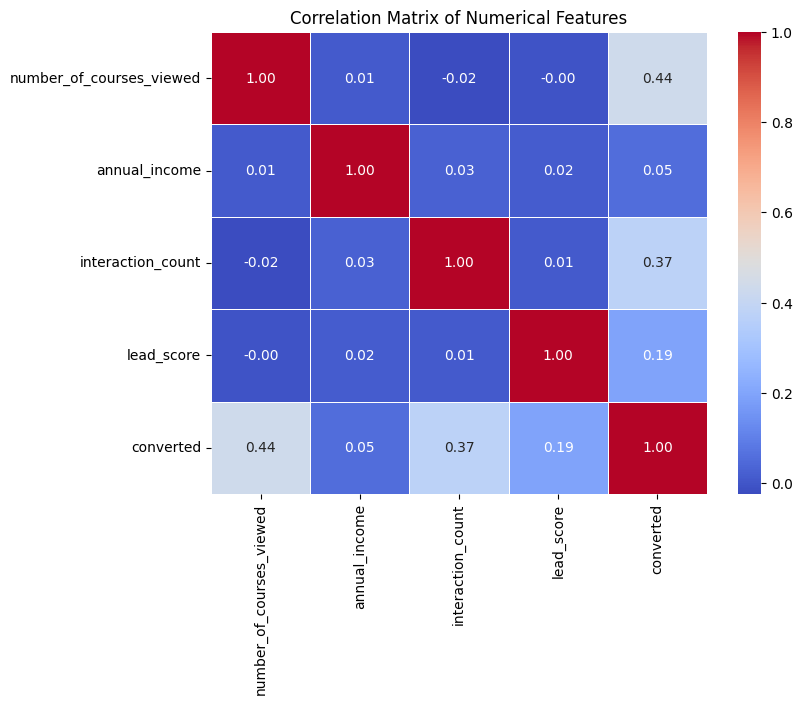

In [22]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [21]:
# Extract relevant pairs
pairs = {
    "interaction_count and lead_score": corr_matrix.loc["interaction_count", "lead_score"],
    "number_of_courses_viewed and lead_score": corr_matrix.loc["number_of_courses_viewed", "lead_score"],
    "number_of_courses_viewed and interaction_count": corr_matrix.loc["number_of_courses_viewed", "interaction_count"],
    "annual_income and interaction_count": corr_matrix.loc["annual_income", "interaction_count"]
}

# Show all pair correlations
for pair, corr in pairs.items():
    print(f"{pair}: {corr:.3f}")

# Identify the pair with the strongest correlation
max_pair = max(pairs, key=lambda k: abs(pairs[k]))
print("\nThe strongest correlation is between:", max_pair)


interaction_count and lead_score: 0.010
number_of_courses_viewed and lead_score: -0.005
number_of_courses_viewed and interaction_count: -0.024
annual_income and interaction_count: 0.027

The strongest correlation is between: annual_income and interaction_count


#### Split the data
    Split your data in train/val/test sets with 60%/20%/20% distribution.
    Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
    Make sure that the target value converted is not in your dataframe.

In [24]:
from sklearn.model_selection import train_test_split

#  Split off the test set (20%)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

#  Split the remaining data into train (60%) and validation (20%)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
# (0.25 * 0.8 = 0.2 → gives 60/20/20 overall)

# Check sizes
print(len(df_train), len(df_val), len(df_test))

# Reset index for all splits
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Extract target arrays
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

# Remove target from feature sets
del df_train['converted']
del df_val['converted']
del df_test['converted']


876 293 293


### Question 3
    Calculate the mutual information score between converted and other categorical variables in the dataset. Use the training set only.
        Round the scores to 2 decimals using round(score, 2).
        Which of these variables has the biggest mutual information score?

In [25]:
from sklearn.metrics import mutual_info_score

# Compute mutual information scores
mi_scores = {}
for col in categorical_cols:
    score = mutual_info_score(df_train[col], y_train)
    mi_scores[col] = round(score, 2)

# Display results
for col, score in mi_scores.items():
    print(f"{col}: {score}")

# Find variable with the largest score
best_feature = max(mi_scores, key=mi_scores.get)
print("\nHighest mutual information feature:", best_feature)


lead_source: 0.04
industry: 0.01
employment_status: 0.01
location: 0.0

Highest mutual information feature: lead_source


### Question 4
    Now let's train a logistic regression.

    Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
    
    Fit the model on the training dataset.

    To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

    Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

    What accuracy did you get?

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

#  Convert training/validation sets to dictionaries
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

#  One-hot encode categorical features
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

# Train logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Compute accuracy
acc = accuracy_score(y_val, y_pred)
print("Validation accuracy:", round(acc, 2))


Validation accuracy: 0.7


### Question 5
    Let's find the least useful feature using the feature elimination technique.

    Train a model using the same features and parameters as in Q4 (without rounding).

    Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

    For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

    Which of following feature has the smallest difference?

        'industry'
        'employment_status'
        'lead_score'
        Note: The difference doesn't have to be positive.

In [29]:

from sklearn.metrics import accuracy_score

base_acc = accuracy_score(y_val, y_pred)
print("Base accuracy:", base_acc)


Base accuracy: 0.6996587030716723


In [30]:
# Function to test accuracy without a feature
def evaluate_without_feature(feature):
    df_train_new = df_train.drop(columns=[feature])
    df_val_new = df_val.drop(columns=[feature])

    dv = DictVectorizer(sparse=False)
    X_train_new = dv.fit_transform(df_train_new.to_dict(orient='records'))
    X_val_new = dv.transform(df_val_new.to_dict(orient='records'))

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_val_new)

    return accuracy_score(y_val, y_pred)

# Evaluate each feature removal
for feature in ['industry', 'employment_status', 'lead_score']:
    acc = evaluate_without_feature(feature)
    diff = base_acc - acc
    print(f"{feature}: {diff:.4f}")


industry: 0.0000
employment_status: 0.0034
lead_score: -0.0068


In [31]:

train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

# Try different C values
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for c in C_values:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(round(acc, 3))
    print(f"C={c}: validation accuracy = {round(acc, 3)}")

# Find best C (smallest if tie)
best_c = C_values[accuracies.index(max(accuracies))]
print("\nBest C:", best_c)


C=0.01: validation accuracy = 0.7
C=0.1: validation accuracy = 0.7
C=1: validation accuracy = 0.7
C=10: validation accuracy = 0.7
C=100: validation accuracy = 0.7

Best C: 0.01
